## Malaria

*Abstract*: Causing over 600k deaths and 200 million cases, malaria is a major global health problem. Improving the identification of cases and efficiency of treatment is one way to help tackle this important issue. This dataset contains images of tissue samples labeled as positive or negative for malaria. Modelers will try to create an algorithm that can correctly identify cases of malaria in order to save the limited time of physicians and epidemiologists. Skills from this project will transfer to any image recognition or classification problem, but particularly those in the health care fields.

- Algorithms: Classification CNN

- Difficulty: Flexible! This dataset can utilize off-the-shelf algorithms from class, but has plenty of depth to warrant customization. The bar for accuracy is higher in health care because we are looking after people’s lives!

## Captone Project Link

Links to Capstone Project slides: [here](https://docs.google.com/presentation/d/1iEMLMUSAA-lEe4EzC0sCbiu405Bow7-4zGIj3SKN-1c/edit#slide=id.g107242abc6f_0_12)

## Motivation

Image classification using deep learning has become very popular, and seems to be one of the best methods. Images with more features (and higher resolution) require more sophisticated networks that are able to consider the translation invariance of features, and other important aspects of image classification. Image analysis is a promising application area for AI in medicine. This project will build skills to understand this application area and the challenges that it presents!


## Load Data

The following code use the *tfds* library to load in "malaria" data sets. This is a big image data set with over 27,000 images. The images are colored which means each image has RGB, i.e. 3 channels. Each image is sized 224 by 224.

In [ ]:
# make sure tensorflow_datasets package is at newest possible version
# to ensure that dataset can be loaded properly.
# runtime will need to be restarted after this package is upgraded.
# press the "RESTART RUNTIME" button that appears,
# and DO NOT RUN THIS CELL after the runtime has restarted.
!pip install --upgrade tensorflow_datasets

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [ ]:
# verify that the tensorflow_datasets package has been updated
print(tfds.__version__)
# version 4.6.0 has been verified to work for loading the datasets

4.9.6


In [ ]:
ds_train, train_info = tfds.load('malaria', split='train', with_info=True, as_supervised=True)

In [ ]:
train_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [ ]:
# function to standardize the image size to what the model expects
def resize_image(im: tf.Tensor, label_tensor: tf.Tensor):
  #im = image.array_to_img(image_tensor.numpy())
  im = tf.image.resize(im, [224, 224])
  #im = image.img_to_array(im)/255.0
  #image_tensor = tf.convert_to_tensor(im, dtype=tf.uint8)
  im = tf.cast(im, tf.float32)/255.0
  return im, label_tensor

In [ ]:
seed = 51
tf.random.set_seed(seed)
ds_train.shuffle(buffer_size=1024, seed=seed)
ds_train = ds_train.map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
train_size = int(27558*0.8)
train_ds = ds_train.take(train_size)
val_ds = ds_train.skip(train_size)
batch_size = 16
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
a, b =next(iter(train_ds))

In [ ]:
# this code runs for a while
# go get a cup of coffee!
X_val = []
y_val = []
for image_0, label in val_ds:
  X_val.append(image_0.numpy())
  y_val.append(label.numpy())
X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [ ]:
print(X_val.shape)
print(y_val.shape)

(5512, 64, 64, 3)
(5512,)


## Define Research Question

## EDA

Examples:

- You can count the number of classes in this data.
- You examine the images according to class labels.
- You can plot the averages of pixel-level values across all images in a particular class. In addition, you can also span the visualization for all classes.

You can refer to more resources here in this [code](https://colab.research.google.com/drive/1KkG1V7RsnKjCRd0zx0h434nqiXwOf-fG?authuser=1).

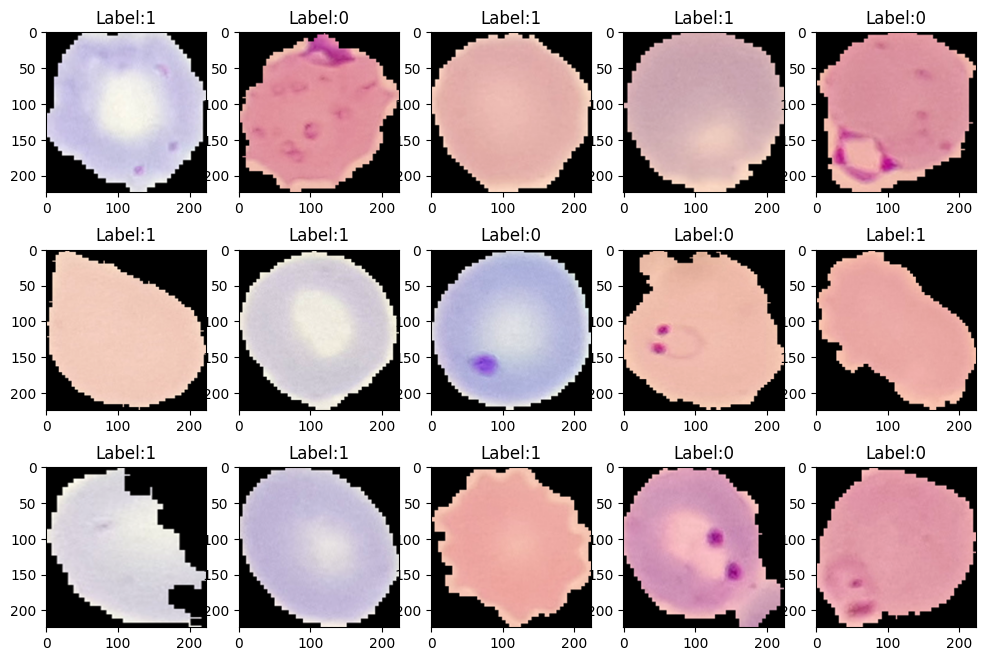

Total number of cases: 27558
Number of positive malaria cases: 13779
Number of negative malaria cases: 13779


In [ ]:
# grid of rows by columns
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    img = images[i] # get an image, defined as "img"
    fig.add_subplot(rows, columns, i) # create subplot (row index, col index, which number of plot)
    plt.title("Label:" + str(labels[i])) # plot the image, along with its label
    plt.imshow(img)
plt.show()

print("Total number of cases:", len(labels))
print("Number of positive malaria cases:", np.sum(labels))
print("Number of negative malaria cases:", len(labels) - np.sum(labels))

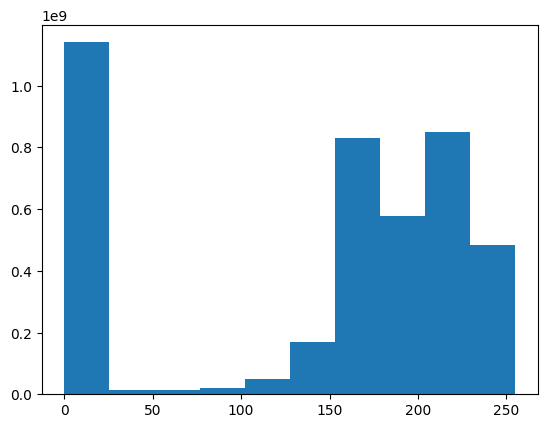

In [ ]:
plt.figure()
plt.hist(np.ravel(images))
plt.show()

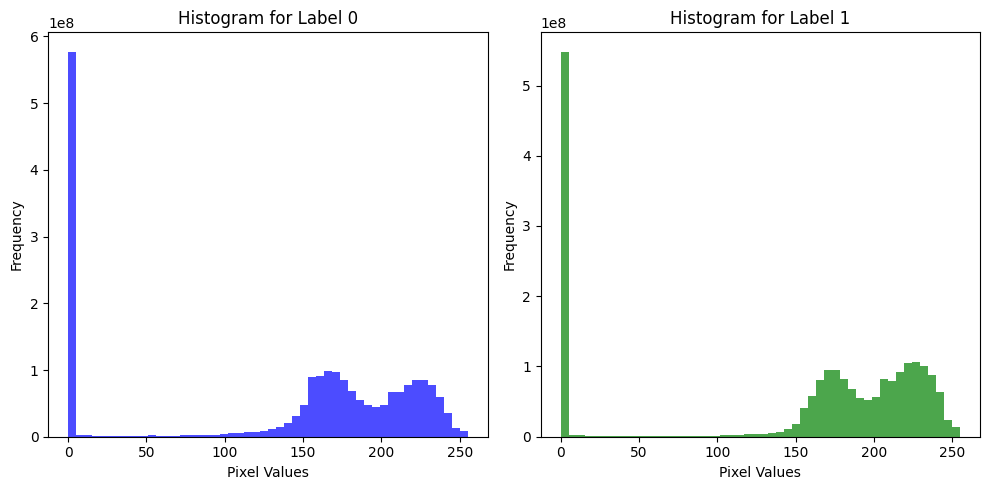

In [ ]:
# Initialize lists to store images and labels for each category
images_label_0 = []
images_label_1 = []

# Iterate through the dataset to separate images based on labels
for i in range(len(labels)):
    if labels[i] == 0:
        images_label_0.append(images[i])
    elif labels[i] == 1:
        images_label_1.append(images[i])

# Convert lists to numpy arrays
images_label_0 = np.array(images_label_0)
images_label_1 = np.array(images_label_1)

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(np.ravel(images_label_0), bins=50, color='blue', alpha=0.7)
plt.title('Histogram for Label 0')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.ravel(images_label_1), bins=50, color='green', alpha=0.7)
plt.title('Histogram for Label 1')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

del images_label_0
del images_label_1

## Baseline Model

Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results.

# To do:

1) Separate training and testing sets

2) Create a traditional neural network model for classification. Code examples are [here](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?authuser=1) for reference.

3) Plot your training and testing accuracy across epochs


## Challenge:

- Create another neural net with a different layer configuration. Does it improve performance?


In [ ]:
print(images[0].shape)

(64, 64, 3)


In [ ]:
images = np.array(images)
print(images.shape)

labels = np.array(labels).reshape(-1, 1)
print(labels.shape)

(27558, 64, 64, 3)
(27558, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=23)

In [ ]:
# helper function that will build model inside our loop
def build_model(n_hidden=1, n_neurons=30):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))
    # Start by flattening image
    model.add(tf.keras.layers.Flatten())

    # Add n_hidden number of hidden layers, each with n_neurons
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer -> 10 neurons for 10 digits, with softmax activation
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'], run_eagerly=True)

    return model

In [ ]:
# use sequential api to build model
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
  tf.keras.layers.Flatten(), # flatten turns the 224x224 shape into one long array of pixels (50176 pixels long)
  tf.keras.layers.Dense(30, activation='relu'), # hidden layer
  tf.keras.layers.Dense(20, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer
  tf.keras.layers.Dense(2, activation='softmax') # output layer
])

# compile model
model.compile(
    optimizer = 'adam', # for this course, we always use adam
    loss = 'sparse_categorical_crossentropy', # since this is classification, we use categorical crossentropy (rather than MSE)
    metrics=['accuracy']) # we'll evaluate based on the accuracy of our predictions

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_10 (Dense)            (None, 30)                368670    
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
Total params: 369522 (1.41 MB)
Trainable params: 369522 (1.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#history=model.fit(X_train, y_train, validation_split=0.3, batch_size=16, epochs=10)
history = model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=batch_size)

Epoch 1/10
1378/1378 [==============================] - 33s 22ms/step - loss: 0.6608 - accuracy: 0.6080 - val_loss: 0.6326 - val_accuracy: 0.6402
Epoch 2/10
1378/1378 [==============================] - 30s 21ms/step - loss: 0.6330 - accuracy: 0.6408 - val_loss: 0.6139 - val_accuracy: 0.6584
Epoch 3/10
1378/1378 [==============================] - 30s 22ms/step - loss: 0.6204 - accuracy: 0.6535 - val_loss: 0.6085 - val_accuracy: 0.6653
Epoch 4/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.6101 - accuracy: 0.6675 - val_loss: 0.6066 - val_accuracy: 0.6669
Epoch 5/10
1378/1378 [==============================] - 37s 27ms/step - loss: 0.6028 - accuracy: 0.6751 - val_loss: 0.6033 - val_accuracy: 0.6740
Epoch 6/10
1378/1378 [==============================] - 30s 21ms/step - loss: 0.5998 - accuracy: 0.6774 - val_loss: 0.6021 - val_accuracy: 0.6738
Epoch 7/10
1378/1378 [==============================] - 36s 26ms/step - loss: 0.5973 - accuracy: 0.6792 - val_loss: 0.6013 -

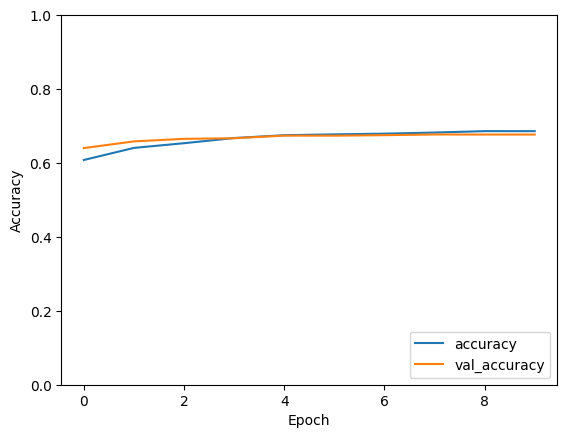

In [ ]:
#plot the training and validation curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) # recall accuracy is between 0 to 1
plt.legend(loc='lower right') # specify location of the legend

173/173 [==============================] - 0s 2ms/step


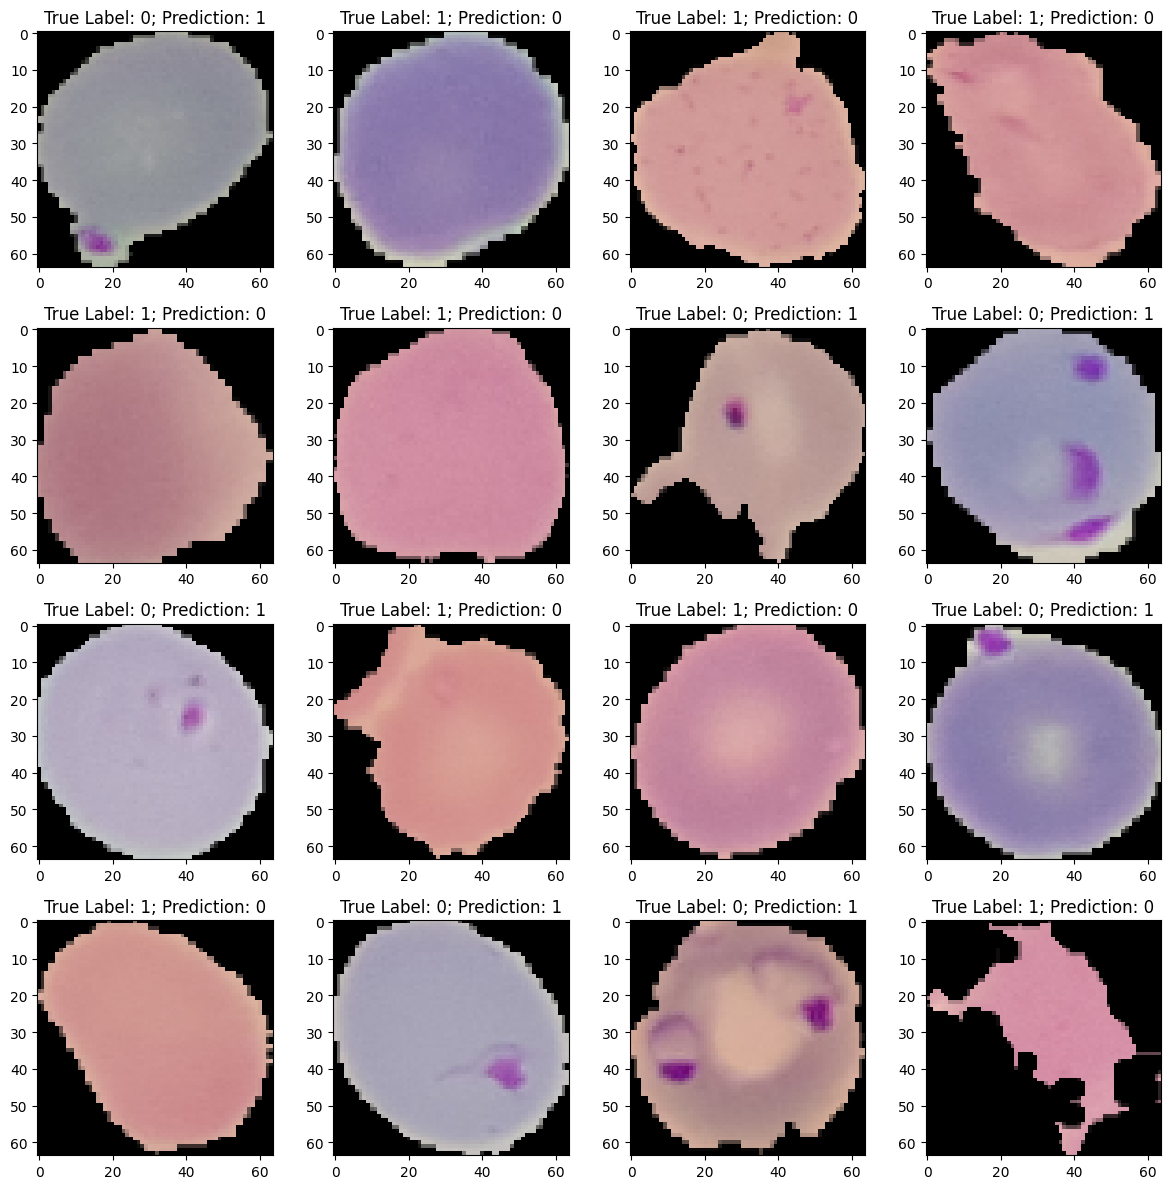

In [ ]:
#show incorrect classifications visually
predictions = model.predict(X_val) # gives us predicted probabilities for each digit
predictions = np.argmax(predictions, axis = 1) # makes predicted digit the classification with highest probability
# indexes where predictions don't match actual digit values
wrong_idxs = np.where(y_val != predictions)[0]

# plot some cases where we made wrong predictions
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = X_val[wrong_idxs[i]] # get a test image
    fig.add_subplot(rows, columns, i) # place it in our grid
    plt.title("True Label: " + str(y_val[wrong_idxs[i]]) + "; Prediction: " + str(predictions[wrong_idxs[i]])) # title with actal digit and predicted digit
    plt.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
wrong_idxs = np.where(y_val != predictions[:, 0])
print(wrong_idxs)

(array([   1,    3,    7, ..., 5508, 5509, 5510]),)


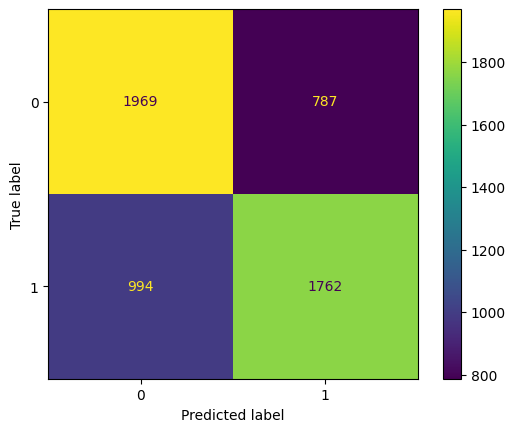

In [ ]:
from sklearn import metrics
#create confusion matrix on test set (predictions vs true)
# compute test set confusion table
## Your Code Starts Here ##
cm = metrics.confusion_matrix(y_val, predictions)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Advanced Model

Examples:
- Build a model that is more complex or can improve upon your predictions for classification.

In [ ]:
model = tf.keras.models.Sequential()
weight_decay = 0.0005

# regularizer.l2
# BatchNormalization
# Dropout

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',
                    input_shape=(64,64,3),kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2))
#model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('softmax'))
#model.add(tf.keras.layers.Activation('sigmoid'))

# compile model
model.compile(
    optimizer = 'adam', # for this course, we always use adam
    loss = 'sparse_categorical_crossentropy', # since this is classification, we use categorical crossentropy (rather than MSE)
    #loss = 'binary_crossentropy', # since this is classification, we use categorical crossentropy (rather than MSE)
    metrics=['accuracy']) # we'll evaluate based on the accuracy of our predictions

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_37 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_39 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 dropout_26 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_38 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                    

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=batch_size)

Epoch 1/10
1378/1378 [==============================] - 181s 119ms/step - loss: 1.9683 - accuracy: 0.8587 - val_loss: 0.8117 - val_accuracy: 0.9541
Epoch 2/10
1378/1378 [==============================] - 160s 116ms/step - loss: 0.5697 - accuracy: 0.9438 - val_loss: 0.5094 - val_accuracy: 0.9067
Epoch 3/10
1378/1378 [==============================] - 159s 116ms/step - loss: 0.4472 - accuracy: 0.9413 - val_loss: 0.5766 - val_accuracy: 0.9053
Epoch 4/10
1378/1378 [==============================] - 160s 116ms/step - loss: 0.5014 - accuracy: 0.9403 - val_loss: 0.5387 - val_accuracy: 0.9401
Epoch 5/10
1378/1378 [==============================] - 163s 118ms/step - loss: 0.5511 - accuracy: 0.9395 - val_loss: 0.6756 - val_accuracy: 0.9019
Epoch 6/10
1378/1378 [==============================] - 108s 78ms/step - loss: 0.5885 - accuracy: 0.9394 - val_loss: 0.7444 - val_accuracy: 0.9033
Epoch 7/10
1378/1378 [==============================] - 89s 65ms/step - loss: 0.6107 - accuracy: 0.9415 - val_los

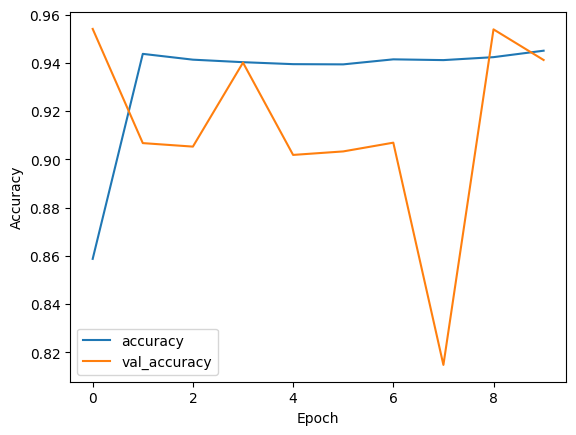

In [ ]:
#plot the training and validation curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() # specify location of the legend
plt.show()

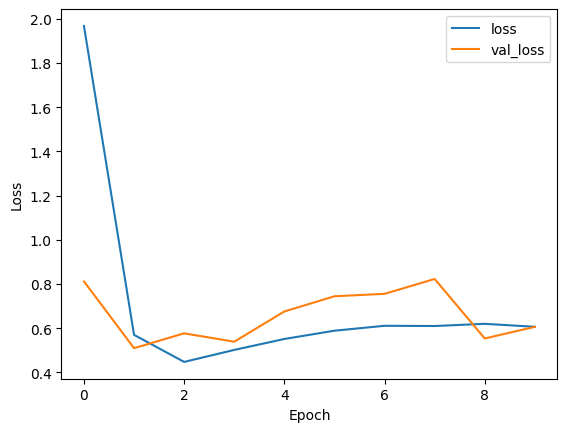

In [ ]:
#plot the training and validation curve
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() # specify location of the legend
plt.show()

173/173 [==============================] - 4s 16ms/step


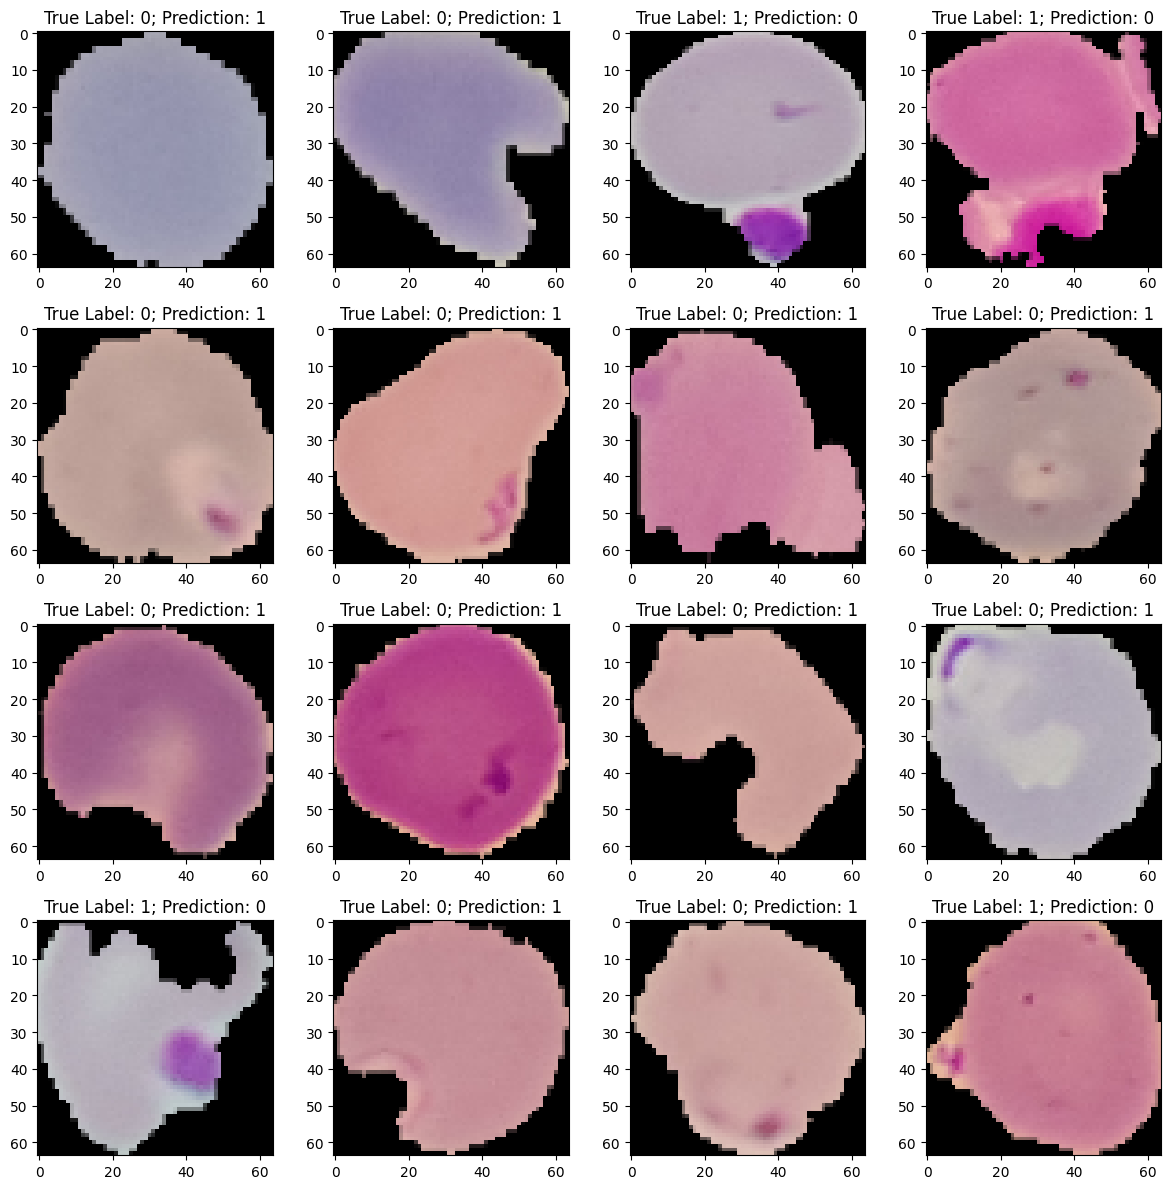

In [ ]:
#show incorrect classifications visually
predictions = model.predict(X_val) # gives us predicted probabilities for each digit
predictions = np.argmax(predictions, axis = 1) # makes predicted digit the classification with highest probability
# indexes where predictions don't match actual digit values
wrong_idxs = np.where(y_val != predictions)[0]

# plot some cases where we made wrong predictions
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = X_val[wrong_idxs[i]] # get a test image
    fig.add_subplot(rows, columns, i) # place it in our grid
    plt.title("True Label: " + str(y_val[wrong_idxs[i]]) + "; Prediction: " + str(predictions[wrong_idxs[i]])) # title with actal digit and predicted digit
    plt.imshow(img)
plt.tight_layout()
plt.show()

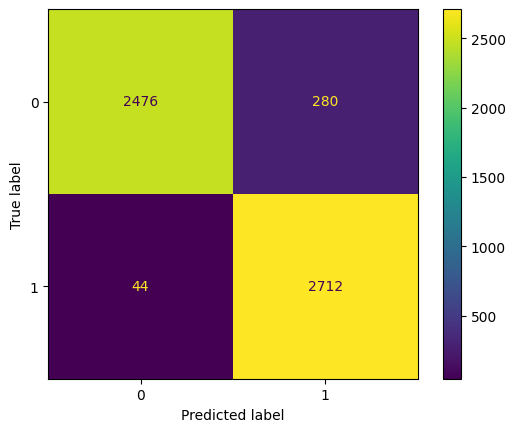

In [ ]:
from sklearn import metrics
#create confusion matrix on test set (predictions vs true)
# compute test set confusion table
## Your Code Starts Here ##
cm = metrics.confusion_matrix(y_val, predictions)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Model Tuning

Recall in Week 5, we discussed hyperparameters tuning. You can refer to this code [here](https://colab.research.google.com/drive/1BdW6zSQ2XAUcLI83CANcFBQaBw5WgepK).

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Interpretation and Future Work

Present and also interpret your experimental performance. Comment on potential future work or research questions that your project leads to.